<a href="https://colab.research.google.com/github/Ushasri11/IPL-Project/blob/main/ipl_prediction_ML_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

In [ ]:
deliveries.shape


(150460, 21)

In [ ]:
matches.shape

(636, 18)

In [ ]:
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [ ]:
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [ ]:
matches['winner'].fillna('Draw',inplace=True)
matches['city'].fillna('Mumbai',inplace=True)
matches['player_of_match'].fillna('No one',inplace=True)

In [ ]:
matches=matches.drop(['umpire3','umpire1','umpire2','date'],axis=1)

In [ ]:
matches['toss_winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

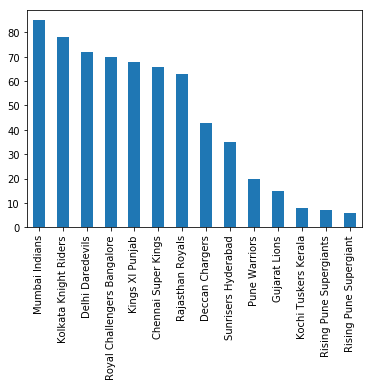

In [ ]:
matches['toss_winner'].value_counts().plot.bar()

Text(0, 0.5, 'percentage')

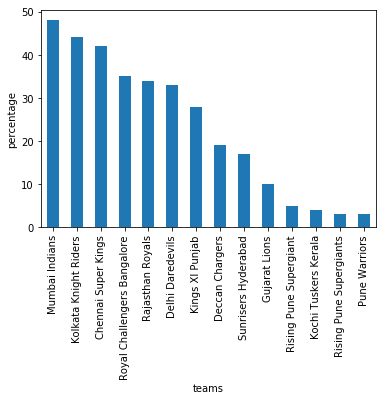

In [ ]:
c=matches[matches.toss_winner==matches.winner]
c['winner'].value_counts().plot.bar()
plt.xlabel('teams')
plt.ylabel('percentage')

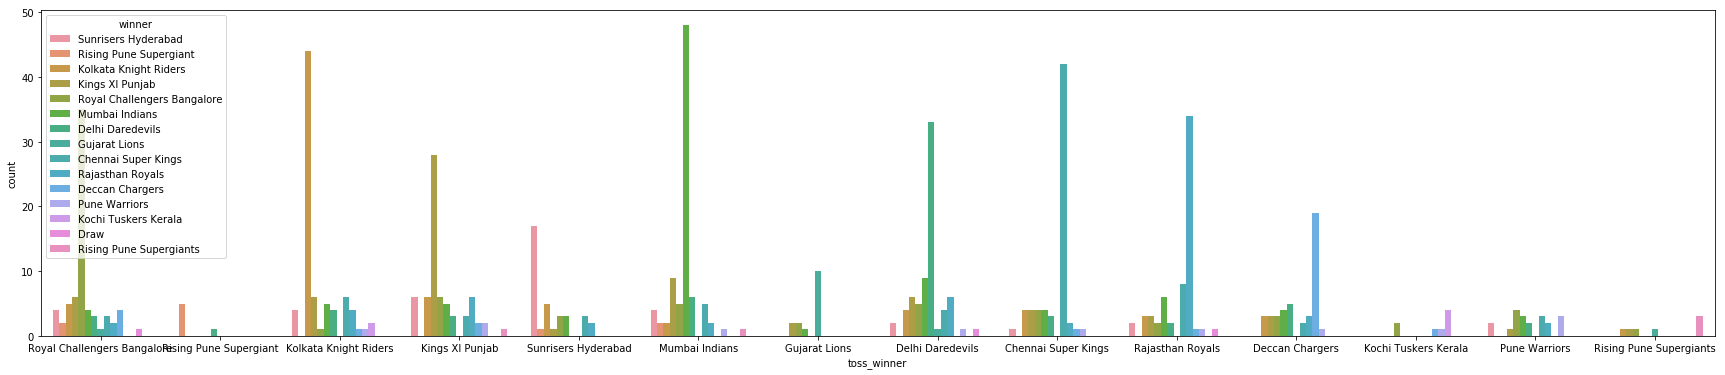

In [ ]:
plt.subplots(figsize=(30,6))
sns.countplot(x='toss_winner',hue='winner',data=matches)
plt.show()

In [ ]:
df=matches[['id','season']]
df.head()

,id,season
0,1,2017
1,2,2017
2,3,2017
3,4,2017
4,5,2017


In [ ]:
df1=deliveries[['match_id','batsman_runs']]
df1.rename(columns={'match_id':'id'},inplace=True)
df1.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,id,batsman_runs
0,1,0
1,1,0
2,1,4
3,1,0
4,1,0


In [ ]:
deliveries.rename(columns={'match_id':'id'},inplace=True)

In [ ]:
df2=pd.merge(df,df1,on='id',how='inner')
df2

,id,season,batsman_runs
0,1,2017,0
1,1,2017,0
2,1,2017,4
3,1,2017,0
4,1,2017,0
5,1,2017,0
6,1,2017,0
7,1,2017,1
8,1,2017,4
9,1,2017,0


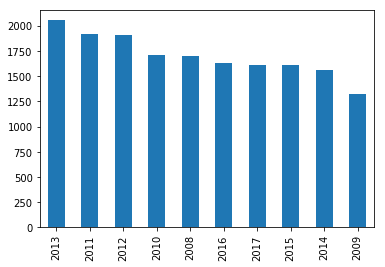

In [ ]:
df3 = df2[df2.batsman_runs==4]
df3['season'].value_counts().plot.bar()

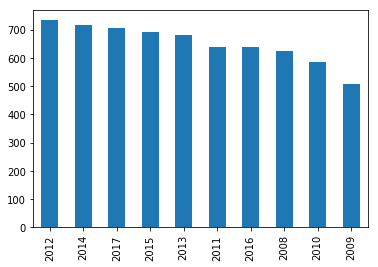

In [ ]:
df4 = df2[df2.batsman_runs==6]
df4['season'].value_counts().plot.bar()

In [ ]:
rod = deliveries[['id','batting_team','total_runs']]
rom = matches[['id','season']]
rod.rename(columns={'id': 'id'}, inplace=True)
rots = pd.merge(rod,rom,on='id',how='inner')
rots

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,id,batting_team,total_runs,season
0,1,Sunrisers Hyderabad,0,2017
1,1,Sunrisers Hyderabad,0,2017
2,1,Sunrisers Hyderabad,4,2017
3,1,Sunrisers Hyderabad,0,2017
4,1,Sunrisers Hyderabad,2,2017
5,1,Sunrisers Hyderabad,0,2017
6,1,Sunrisers Hyderabad,1,2017
7,1,Sunrisers Hyderabad,1,2017
8,1,Sunrisers Hyderabad,4,2017
9,1,Sunrisers Hyderabad,1,2017


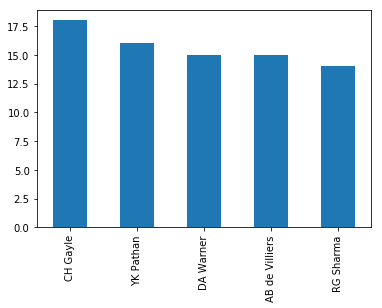

In [ ]:
mdata=matches['player_of_match'].value_counts().head().plot.bar()

In [ ]:
a = 'Mumbai Indians'
b = 'Chennai Super Kings'
mt1=matches[(((matches['team1']==a)&(matches['team2']==b))|((matches['team1']==b)&(matches['team2']==a)))]
mt1 = mt1[['team1','team2','winner']]
tc = mt1.groupby(['team1','team2','winner']).size().reset_index().rename(columns={0:'count'})
tc.loc[0,'count'] = tc.loc[0,'count'] + tc.loc[2,'count']
tc.loc[1,'count'] = tc.loc[1,'count'] + tc.loc[3,'count']
tc.loc[0,'team1_wins'] = tc.loc[0,'count']
tc.loc[0,'team2_wins'] = tc.loc[1,'count']
tc.drop(['winner','count'],axis=1,inplace=True)
tc = tc[:1]
tc

,team1,team2,team1_wins,team2_wins
0,Chennai Super Kings,Mumbai Indians,10.0,12.0


In [ ]:
a = 'Chennai Super Kings'
team_l = ['Sunrisers Hyderabad','Mumbai Indians','Gujarat Lions','Rising Pune Supergiants','Royal Challengers Bangalore','Kolkata Knight Riders','Delhi Daredevils','Kings XI Punjab','Chennai Super Kings','Rajasthan Royals','Deccan Chargers','Kochi Tuskers Kerala','Pune Warriors']
team_l.remove(a)
teams = team_l.copy()
mt1=matches[((matches['team1']==a)|(matches['team2']==a))]
mt1 = mt1[['team1','team2','winner']]
mtag = mt1.groupby(['team1','team2','winner']).size().reset_index().rename(columns={0:'count'})
mtag
for i in range(0,len(mtag)):
  if mtag.loc[i,'team1'] != a:
    t = mtag.loc[i,'team1']
    mtag.loc[i,'team1'] = mtag.loc[i,'team2']
    mtag.loc[i,'team2'] = t
mtagg = mtag.groupby(['team1','team2','winner'])['count'].sum().reset_index()
for i in range(0, len(mtagg),2):
  mtagg.loc[i,'looses'] = mtagg.loc[i+1,'count']
mtagg = mtagg.iloc[::2]
mtagg

,team1,team2,winner,count,looses
0,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,6,4.0
2,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,11,5.0
4,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,10,7.0
6,Chennai Super Kings,Kochi Tuskers Kerala,Chennai Super Kings,1,1.0
8,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,10,6.0
10,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,10,12.0
12,Chennai Super Kings,Pune Warriors,Chennai Super Kings,4,2.0
14,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,11,6.0
16,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,12,7.0
18,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,4,2.0


In [ ]:
a=deliveries.groupby(['id','batting_team'])['total_runs'].sum().reset_index()
b=a[a['total_runs']>200]
b200=b.sort_values(by='total_runs',ascending=False)
b200.head()


,id,batting_team,total_runs
820,411,Royal Challengers Bangalore,263
1237,620,Royal Challengers Bangalore,248
410,206,Chennai Super Kings,246
120,61,Chennai Super Kings,240
1121,562,Royal Challengers Bangalore,235


In [ ]:
b200['batting_team'].value_counts()

Kings XI Punjab                12
Chennai Super Kings            11
Royal Challengers Bangalore    11
Mumbai Indians                  9
Rajasthan Royals                6
Sunrisers Hyderabad             6
Delhi Daredevils                4
Kolkata Knight Riders           2
Deccan Chargers                 1
Gujarat Lions                   1
Name: batting_team, dtype: int64

In [ ]:
c5=deliveries.groupby(['id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
d=pd.DataFrame(columns=['id','inning','batting_team','bowling_team','total_runs'])
p=q=0
for i in range(0,len(c5),2):
  x=c5.loc[i,'total_runs']
  y=c5.loc[i+1,'total_runs']
  if x>200:
    p=p+1
    if y>x:
      d=d.append(c5[c5['id'] == c5.loc[i,'id']])
      q=q+1
d
print((q/p)*100,"%")

8.333333333333332 %


In [ ]:
d

,id,inning,batting_team,bowling_team,total_runs
82,41,1,Gujarat Lions,Delhi Daredevils,208
83,41,2,Delhi Daredevils,Gujarat Lions,214
136,68,1,Deccan Chargers,Rajasthan Royals,214
137,68,2,Rajasthan Royals,Deccan Chargers,217
364,181,1,Kings XI Punjab,Royal Challengers Bangalore,203
365,181,2,Royal Challengers Bangalore,Kings XI Punjab,204


In [ ]:
cmpBats = pd.DataFrame(columns=['batsman','dots','singles','Twos','Threes','Fours','Sixes','total_runs','Average','Strike_rate'])

dfc=deliveries.groupby(['batsman'])['ball'].count().reset_index()
runs=deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
ones=deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==1).sum()).reset_index()
twos=deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==2).sum()).reset_index()
threes=deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==3).sum()).reset_index()
dots=deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index()
sixes=deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=deliveries.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
dfc=dfc.merge(dots,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'dots'},inplace=True)
dfc=dfc.merge(ones,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'ones'},inplace=True)
dfc=dfc.merge(twos,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'twos'},inplace=True)
dfc=dfc.merge(threes,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'threes'},inplace=True)
dfc=dfc.merge(sixes,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'Fours'},inplace=True)
dfc=dfc.merge(fours,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'sixes'},inplace=True)
dfc=dfc.merge(runs,on='batsman',how='outer')
runs=deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
dfc.rename({'ball':'balls_faced','batsman_runs':'runs_scored'},axis=1,inplace=True)
dfc['strike_rate']=dfc['runs_scored']/dfc['balls_faced']*100
dfc.head()

,batsman,balls_faced,dots,ones,twos,threes,Fours,sixes,runs_scored,strike_rate
0,A Ashish Reddy,196,61,83,20,1,16,15,280,142.857143
1,A Chandila,7,3,4,0,0,0,0,4,57.142857
2,A Chopra,75,45,21,2,0,7,0,53,70.666667
3,A Choudhary,20,4,13,1,0,1,1,25,125.000000
4,A Flintoff,57,24,23,2,1,5,2,62,108.771930


In [ ]:
dfc

,batsman,balls_faced,dots,ones,twos,threes,Fours,sixes,runs_scored,strike_rate
0,A Ashish Reddy,196,61,83,20,1,16,15,280,142.857143
1,A Chandila,7,3,4,0,0,0,0,4,57.142857
2,A Chopra,75,45,21,2,0,7,0,53,70.666667
3,A Choudhary,20,4,13,1,0,1,1,25,125.000000
4,A Flintoff,57,24,23,2,1,5,2,62,108.771930
5,A Kumble,49,24,21,1,0,3,0,35,71.428571
6,A Mishra,382,168,162,20,0,27,5,340,89.005236
7,A Mithun,26,11,8,2,0,4,1,34,130.769231
8,A Mukund,23,9,11,2,0,1,0,19,82.608696
9,A Nehra,63,37,21,1,0,3,1,41,65.079365


In [ ]:
cmp = pd.DataFrame()
cmp = cmp.append(dfc[dfc['batsman']=='V Kohli'])
cmp = cmp.append(dfc[dfc['batsman']=='RG Sharma'])
cmp

,batsman,balls_faced,dots,ones,twos,threes,Fours,sixes,runs_scored,strike_rate
431,V Kohli,3494,1287,1410,242,11,384,160,4423,126.588437
323,RG Sharma,3274,1185,1379,177,5,354,173,4207,128.497251


In [ ]:
a1=deliveries.groupby(['batsman'])['total_runs'].sum().reset_index()
b1=a1.sort_values(by='total_runs',ascending=False)
t10b=b1['batsman'].head().reset_index()
t10b

,index,batsman
0,374,SK Raina
1,431,V Kohli
2,137,G Gambhir
3,323,RG Sharma
4,103,DA Warner


In [ ]:
u=deliveries.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
u=u.pivot('batsman','batsman_runs','total_runs')
u[4].sort_values(ascending = False).head()

batsman
G Gambhir    484.0
SK Raina     402.0
DA Warner    401.0
S Dhawan     401.0
V Kohli      384.0
Name: 4, dtype: float64

In [ ]:
tis=deliveries.groupby(['batsman'])['total_runs'].sum().reset_index()
tis1=tis.sort_values(by='total_runs',ascending=False)
tis1.head()

,batsman,total_runs
374,SK Raina,4745
431,V Kohli,4588
137,G Gambhir,4388
323,RG Sharma,4334
103,DA Warner,4213


In [ ]:
tbe=deliveries.groupby(['id','inning','batsman'])['batsman_runs'].sum().reset_index()
tbe1=tbe.sort_values(by="batsman_runs",ascending=False)
tbe1.head().reset_index()

,index,id,inning,batsman,batsman_runs
0,6217,411,1,CH Gayle,175
1,902,60,1,BB McCullum,158
2,8458,562,1,AB de Villiers,133
3,9289,620,1,AB de Villiers,129
4,5596,372,1,CH Gayle,128


In [ ]:
f=deliveries.groupby(['batsman','batsman_runs'])['total_runs'].sum().reset_index()
tis1=tis1.head()
ff=tis1['batsman'].unique()
ff=ff.tolist()
ff

['SK Raina', 'V Kohli', 'G Gambhir', 'RG Sharma', 'DA Warner']

In [ ]:
fff=f[f['batsman'].isin(ff)]
fff

,batsman,batsman_runs,total_runs
459,DA Warner,0,191
460,DA Warner,1,1000
461,DA Warner,2,414
462,DA Warner,3,39
463,DA Warner,4,1606
464,DA Warner,6,963
616,G Gambhir,0,248
617,G Gambhir,1,1317
618,G Gambhir,2,491
619,G Gambhir,3,45


In [ ]:
outs = ["bowled", "stumped", "caught", "lbw", "caught and bowled"]
hwt=deliveries[deliveries["dismissal_kind"].isin(outs)]
hwtaker=hwt['bowler'].value_counts().reset_index()
hwtaker.head()
hwt

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,0,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,0,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,0,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,0,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN
165,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,7,3,CH Gayle,TM Head,DJ Hooda,0,0,0,0,0,0,0,0,0,CH Gayle,caught,DA Warner
206,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,13,5,TM Head,SR Watson,Rashid Khan,0,0,0,0,0,0,0,0,0,TM Head,caught,Yuvraj Singh
211,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,14,4,Sachin Baby,SR Watson,Bipul Sharma,0,0,0,0,0,0,0,0,0,Sachin Baby,caught,MC Henriques
230,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,17,5,STR Binny,SR Watson,B Kumar,0,0,0,0,0,0,0,0,0,STR Binny,caught,Yuvraj Singh
234,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,3,SR Watson,S Aravind,A Nehra,0,0,0,0,0,0,0,0,0,SR Watson,caught,MC Henriques


In [ ]:
max=deliveries.groupby(['bowler']).sum()
max['balls_count']=deliveries['bowler'].value_counts()
max['overs_count']=(max['balls_count']//6)
max1=max.sort_values(by='overs_count',ascending=False)['overs_count'].reset_index()
max1

,bowler,overs_count
0,Harbhajan Singh,498
1,A Mishra,450
2,SL Malinga,449
3,P Kumar,439
4,PP Chawla,432
5,R Ashwin,393
6,Z Khan,379
7,R Vinay Kumar,360
8,DW Steyn,359
9,IK Pathan,352


In [ ]:
max2=max1[max1['overs_count']>300]
max2

,bowler,overs_count
0,Harbhajan Singh,498
1,A Mishra,450
2,SL Malinga,449
3,P Kumar,439
4,PP Chawla,432
5,R Ashwin,393
6,Z Khan,379
7,R Vinay Kumar,360
8,DW Steyn,359
9,IK Pathan,352


In [ ]:
hd = hwt[['batsman','bowler']]
hd = hd.groupby(['batsman','bowler']).size().reset_index().rename(columns={0:'count'})
hdbb = hd.sort_values(by='count',ascending = False)
hdbb = hdbb.drop_duplicates('batsman').reset_index()
hdbb

,index,batsman,bowler,count
0,3145,MS Dhoni,Z Khan,7
1,3884,RG Sharma,R Vinay Kumar,6
2,1552,G Gambhir,Z Khan,6
3,5044,V Kohli,A Nehra,6
4,403,AM Rahane,B Kumar,6
5,4696,SR Watson,RA Jadeja,5
6,4421,SK Raina,Harbhajan Singh,5
7,3415,PA Patel,B Kumar,5
8,2204,KC Sangakkara,R Sharma,5
9,550,AT Rayudu,MM Sharma,5


In [ ]:
mtd11 = matches[['id','season']]
mtd11 = mtd11.loc[mtd11['season']>=2015]
deld11 = deliveries[['id','batsman','batsman_runs','bowler','dismissal_kind','fielder']]
mdd11 = pd.merge(mtd11,deld11,on='id',how='inner')
stumps = mdd11.groupby('fielder')['dismissal_kind'].agg(lambda x: (x=='stumped').sum()).reset_index()
stumps = stumps.sort_values(by='dismissal_kind',ascending=False).head().reset_index()
stumps = stumps.head()
wk = stumps['fielder'].unique()
wk = wk.tolist()
wk

['RV Uthappa', 'MS Dhoni', 'WP Saha', 'KD Karthik', 'PA Patel']

In [ ]:
scrs = mdd11.groupby(["batsman"])["batsman_runs"].sum().reset_index()
scrs = scrs.sort_values(by='batsman_runs',ascending=False)
wt = scrs[scrs['batsman'].isin(wk)]
wkt = wt.iloc[0]['batsman']
scrs = scrs[scrs.batsman!=wkt]

WicketKeeper = wt[:1]['batsman'].tolist()
WicketKeeper

['RV Uthappa']

In [ ]:
fielders = mdd11.groupby('fielder')['dismissal_kind'].agg(lambda x: (x=='caught').sum()).reset_index()
fielders = fielders.sort_values(by='dismissal_kind',ascending=False).reset_index()
best_fielders = fielders.head(100)
bf = best_fielders['fielder'].unique()
bf = bf.tolist()

In [ ]:
btsms = scrs[scrs['batsman'].isin(bf)]
Batsmans = btsms[:4]['batsman'].tolist()

Batsmans

['DA Warner', 'V Kohli', 'AB de Villiers', 'AM Rahane']

In [ ]:
saa=mdd11[mdd11["dismissal_kind"].isin(outs)]
blwr=saa['bowler'].value_counts().reset_index()
btsms = scrs[scrs['batsman'].isin(bf)]
wktsmean = blwr["bowler"].mean()
scrmean = btsms['batsman_runs'].mean()
allr = btsms.loc[btsms['batsman_runs']>500]
allr = allr[6:]
allrr = blwr.loc[blwr['bowler']>18]
allrr = allrr[6:]
allr1 = allrr['index'].unique()
allr1 = allr1.tolist()
alr = allr[allr['batsman'].isin(allr1)]
Allrounders = alr[:2]['batsman'].tolist()

Allrounders

['MC Henriques', 'SR Watson']

In [ ]:
Bowlers = blwr[:4]['index'].tolist()

Bowlers

['B Kumar', 'YS Chahal', 'MJ McClenaghan', 'Sandeep Sharma']

In [ ]:
Team11 = WicketKeeper + Batsmans +Allrounders + Bowlers
Squad = Team11 
Squad

['RV Uthappa',
 'DA Warner',
 'V Kohli',
 'AB de Villiers',
 'AM Rahane',
 'MC Henriques',
 'SR Watson',
 'B Kumar',
 'YS Chahal',
 'MJ McClenaghan',
 'Sandeep Sharma']

In [ ]:
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')
matches['winner'].fillna('Draw',inplace=True)
matches['city'].fillna('Mumbai',inplace=True)
matches['player_of_match'].fillna('No one',inplace=True)
matches['umpire2'].fillna('SJA Taufel',inplace=True)
matches['umpire1'].fillna('HDPK Dharmasena',inplace=True)
matches=matches.replace('Rising Pune Supergiant','Rising Pune Supergiants')
matches = matches.drop(['umpire3','date'],axis=1)

In [ ]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


In [ ]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    matches[i] = le.fit_transform(matches[i])
matches.dtypes

id                  int64
season              int64
city                int64
team1               int64
team2               int64
toss_winner         int64
toss_decision       int64
result             object
dl_applied          int64
winner              int64
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue               int64
umpire1            object
umpire2            object
dtype: object

In [ ]:
x=matches.drop(['id','season','result','dl_applied','winner','player_of_match','umpire1','umpire2'],axis=1)
y=matches['winner']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
x.head(1)
x.dtypes

city              int64
team1             int64
team2             int64
toss_winner       int64
toss_decision     int64
win_by_runs       int64
win_by_wickets    int64
venue             int64
dtype: object

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rdf = RandomForestClassifier(n_estimators=20, random_state=0)  
rdf.fit(x_train, y_train)  
y_predte = rdf.predict(x_test)  
y_predtr = rdf.predict(x_train) 

In [ ]:
sc=metrics.accuracy_score(y_test,y_predte) #gives the accuracy of the model
print("Accuracy of Test:", sc)
sc1=metrics.accuracy_score(y_train,y_predtr) #gives the accuracy of the model
print("Accuracy of Train:",sc1)

Accuracy of Test: 0.7277486910994765
Accuracy of Train: 0.9977528089887641


In [ ]:
dictVal = encode['winner']

input=['13','1','11','1','0','1','0','23']
input = np.array(input).reshape((1, -1))
output=rdf.predict(input)
print(list(dictVal.keys())[list(dictVal.values()).index(output)])

MI
